# Imports et fonctions utiles

In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np
import scipy.sparse as scps
import scipy.sparse.linalg as ssl
import math

### Maillage triangulaire

In [10]:
def maillage_triang(n):
#
# Une discretisation possible d'une EDP elliptique sur le domaine ]0,1[ x ]0,1[
# Le carre [0,1]x[0,1] est maille uniquement avec des triangles; 
# Les conditions limites sont de type Dirichlet uniquement   => neumann  =[];
#
# Entrees :
# n : nombre de points par cote du care => Npts points de discretisation au
# total
#
# Sorties :
# coordinates : matrice a deux colonnes. Chaque ligne contient les 
# coordonnes 2D d'un des points de la discretisation. Ces sommets seront 
# identifies a l'indice de la ligne correspondante dans la matrice
# coordinates.
# elements3 : matrice a trois colonnes. Chaque ligne contient les indices 
# des sommets d'un element triangle, dans le sens antihoraire. 
# dirichlet : vecteur colonne des indices des sommets de la frontiere de
# Dirichlet.
# neumann : matrice a deux colonnes. Chaque ligne contient les indices 
# des deux sommets d'une arete de la frontiere de Neumann.
# (neumann est vide sur cet exemple)
#
##################################################################################
    h=1/(n-1)
    npoin       = n*n ; 
    nelem       = 2*(n-1)*(n-1) ;
    coordinates = np.zeros((npoin,2)); 
    elements3   = (np.zeros((nelem,3))).astype(int) ;
    neumann     = [];
    dirichlet=(np.zeros((4*n-4,1))).astype(int)
    # Coordonnees et connectivites :
    e = -1 ; 
    p = -1 ;
    x=np.zeros((n+1,1))
    x[n,0]=1.
    for l in range (n+1):
        x[l,0]=l*h
    for j in range (n):
            for i in range(n):
                p = p + 1  
                coordinates[p,0] = x[i,0]
                coordinates[p,1] = x[j,0] 
                if ((i != n-1) & (j != n-1)):
                    p1 = p
                    p2 = p1 + 1 
                    p3 = p1 + n 
                    p4 = p2 + n 
                    e = e + 1 
                    elements3[e,0] = p1 
                    elements3[e,1] = p2 
                    elements3[e,2] = p3 
                    e = e + 1
                    elements3[e,0] = p4 
                    elements3[e,1] = p3 
                    elements3[e,2] = p2 
    #Liste des sommets de la frontiere de Dirichlet:
    p=-1
    for j in range(n):
        p=p+1
        dirichlet[p,0] = j  
    for j in range(n*2-1,n*(n-1),n):
        p=p+1
        dirichlet[p,0] = j 
    for j in range(n*n-1,n*n-n-1,-1):
        p=p+1
        dirichlet[p,0] = j 
    for j in range(n*n-2*n,n-1,-n):
        p=p+1
        dirichlet[p,0] = j 

    return coordinates, elements3, dirichlet, neumann

### Maillage quadrangles

In [11]:
def maillage_quadrangle(n):
    #
    # Une discretisation possible d'une EDP elliptique sur le domaine ]0,1[ x ]0,1[
    # Le carre [0,1]x[0,1] est maille uniquement avec des quadrangles; 
    # Les conditions limites sont de type Dirichlet et Neumann
    #
    # Entrees :
    # n : nombre de points par cote du carre => Nbr points de discretisation au
    # total
    #
    # Sorties :
    # coordinates : matrice a deux colonnes. Chaque ligne contient les 
    # coordonnes 2D d'un des points de la discretisation. Ces sommets seront 
    # identifies a l'indice de la ligne correspondante dans la matrice
    # coordinates.
    # elements4 : matrice a 4 colonnes. Chaque ligne contient les indices 
    # des sommets d'un element quadrangle, dans le sens antihoraire. 
    # dirichlet : vecteur colonne des indices des sommets de la frontiere de
    # Dirichlet.
    # neumann : matrice a deux colonnes. Chaque ligne contient les indices 
    # des deux sommets d'une arete de la frontiere de Neumann.
    #
    ##################################################################################
    h = 1/(n-1)
    npoin       = n*n
    nelem       = (n-1)*(n-1)
    coordinates = np.zeros((npoin,2))
    elements4   = (np.zeros((nelem,4))).astype(int)
    neumann     = (np.zeros((4*n-4,2))).astype(int)
    dirichlet   = (np.zeros((4*n-4,1))).astype(int)
    # Coordonnees et connectivites :
    e = -1 ; 
    p = -1 ;
    x=np.zeros((n+1,1))
    x[n,0]=1.
    for l in range (n+1):
        x[l,0]=l*h
    for j in range (n):
            for i in range(n):
                p = p + 1  
                coordinates[p,0] = x[i,0]  
                coordinates[p,1] = x[j,0] 
                if ((i != n-1) & (j != n-1)):
                    p1 = p
                    p2 = p1 + 1 
                    p3 = p1 + n 
                    p4 = p2 + n 
                    e = e + 1 
                    elements4[e,0] = p1 
                    elements4[e,1] = p2 
                    elements4[e,2] = p3 
                    elements4[e,3] = p4 
    #Liste des sommets de la frontiere de Dirichlet:
    p=-1
    for j in range(n):
        p=p+1
        dirichlet[p,0] = j  
    for j in range(n*2-1,n*(n-1),n):
        p=p+1
        dirichlet[p,0] = j 
    for j in range(n*n-1,n*n-n-1,-1):
        p=p+1
        dirichlet[p,0] = j 
    for j in range(n*n-2*n,n-1,-n):
        p=p+1
        dirichlet[p,0] = j 
    #Liste des aretes de la frontiere de Neumann:
    p=-1
    for j in range(n-1):
        p=p+1
        neumann[p,0] = j
        neumann[p,1] = j + 1
    for j in range(n*2-1,n*(n-1),n):
        p=p+1
        neumann[p,0] = j
        neumann[p,1] = j + 1
    for j in range(n*n-1,n*n-n-1,-1):
        p=p+1
        neumann[p,0] = j
        neumann[p,1] = j - 1
    for j in range(n*n-2*n,n-1,-n):
        p=p+1
        neumann[p,0] = j
        neumann[p,1] = j - 1

    return coordinates, elements4, dirichlet, neumann
    

### Fonctions d'affichage

In [12]:
def show(coordinates,u):
#
# Fonction d'affichage de la solution u sur le maillage defini par
# elements3, coordinates.
#
# Entrees:
# elements3 : matrice a trois colonnes contenant les elements triangles
# de la discretisation, identifies par les indices de leurs trois
# sommets.
# coordinates : matrice a deux colonnes contenant les coordonnes 2D des
# points de la discretisation.
# u : vecteur colonne de longueur egale au nombre de lignes de
# coordinates contenant les valeurs de la solution a afficher aux
# points de la discretisation.
#
# Sorties : Aucune, mais la fonction doit s'afficher dans une figure.
##########################################################################
    ax= plt.figure().add_subplot(projection='3d')
    ax.plot_trisurf(coordinates[:,0],coordinates[:,1],u,linewidth=0.2,antialiased=True)
    plt.show()



def show_carre(coordinates,u):
    n = int(np.sqrt(len(coordinates))) - 1

    # reshape into grids
    X = coordinates[:,0].reshape((n+1,n+1))
    Y = coordinates[:,1].reshape((n+1,n+1))
    Z = u.reshape((n+1,n+1))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
    plt.show()


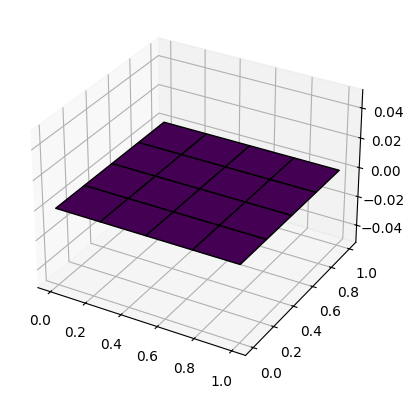

In [13]:
# TEST implémentation show_carre et maillage_quadrangle
n = 5 # nombre de points de la discretisation du maillage
coordinates, elements4, dirichlet, neumann = maillage_quadrangle(n)
show_carre(coordinates, np.zeros(len(coordinates)))


### Maillage mixte

In [19]:
############################# Maillage mixte ################
e3=np.array([[1,2,12],[2,3,12],[3,4,14],[4,5,14],[2,15,3],[3,15,4]]).astype(int)
e4=np.array([[0,1,12,11],[11,12,13,10],[12,3,14,13],[10,13,8,9],[13,14,7,8],[14,5,6,7]]).astype(int)
dds=np.array([2,15,4,6,7,8,9,10,11,0]).astype(int)
nns=np.array([[4,5],[5,6],[0,1],[1,2]]).astype(int)
ccs=np.array([[0.,0.],[0.33333333333333,0],[0.53333333333333,0.],
                      [0.66666666666667,0.33333333333333],[1.,0.47],[1,0.66666666666667],
                     [1.,1.],[0.66666666666667,1.],[0.33333333333333,1.], [0.,1.],
                     [0.,0.66666666666667],[0.,0.33333333333333],[0.33333333333333,0.33333333333333],
                     [0.33333333333333,0.66666666666667],[0.66666666666667,0.66666666666667],[1.,0.]])

### Fonctions du problème

In [70]:
def f(x,y):
    return 1

def ud(x,y):
    return 0

# Section 1 : première implémentation

## Partie 1 : maillage triangulaire et conditions de Dirichlet

#### Resolution avec triangles et conditions de Dirichlet

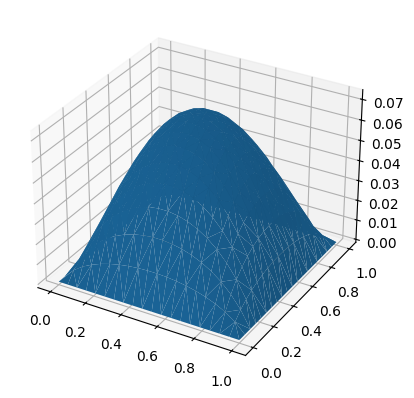

In [71]:
# RESOLUTION PARTIE 1 AVEC TRIANGLES

from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve


n = 20 # nombre de points de la discretisation du maillage
coordinates, elements3, dirichlet, neumann = maillage_triang(n)
b = np.zeros(n*n) # second membre

# matrice de raideur
A = csr_matrix((n*n, n*n), dtype=np.float32)

for e in elements3:
    # coordonnées 2D du triangle courant e 
    x1, y1 = coordinates[e[0]]
    x2, y2 = coordinates[e[1]]
    x3, y3 = coordinates[e[2]]
    T_local = np.array([[x1,x2,x3],[y1,y2,y3]])

    alpha = np.linalg.det(np.array([[x2-x1, x3-x1], [y2-y1, y3-y1]]))

    # aire du triangle courant
    triang_area = alpha / 2


    ## CALCUL SECOND MEMBRE
    # coordonnées centre du triangle
    xg = (x1 + x2 + x3) / 3
    yg = (y1 + y2 + y3) / 3

    # contribution du triangle courant au second membre
    b_local = (alpha / 6) * f(xg, yg)

    # ajouter la contribution au second membre b aux indices correspondants aux sommets du triangle courant 
    b[e[0]] += b_local
    b[e[1]] += b_local
    b[e[2]] += b_local


    ## CALCUL MATRICE DE RAIDEUR
    # ajouter la contribution du triangle courant à la matrice de raideur A aux indices correspondants aux sommets du triangle courant 
    A_local = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            grad_basis_fct_i = (1 / alpha) * np.array([T_local[1,(i+1)%3]-T_local[1,(i+2)%3], T_local[0,(i+2)%3]-T_local[0,(i+1)%3]])
            grad_basis_fct_j = (1 / alpha) * np.array([T_local[1,(j+1)%3]-T_local[1,(j+2)%3], T_local[0,(j+2)%3]-T_local[0,(j+1)%3]])
            A_local[i,j] = (alpha / 2) * np.dot(np.transpose(grad_basis_fct_i), grad_basis_fct_j)
            
            A[e[i], e[j]] += A_local[i,j]
    

# ajouter conditions de Dirichlet
for ind in dirichlet:
    b[ind] = ud(coordinates[ind,0], coordinates[ind,1])
    A[ind, :] = 0
    A[ind, ind] = 1

# résolution système linéaire
x = spsolve(A, b)

show(coordinates, x)

    

## Partie 2 : maillage mixte et ajoût des conditions de Neumann

#### Résolution avec quadrangles et conditions de Dirichlet et Neumann 

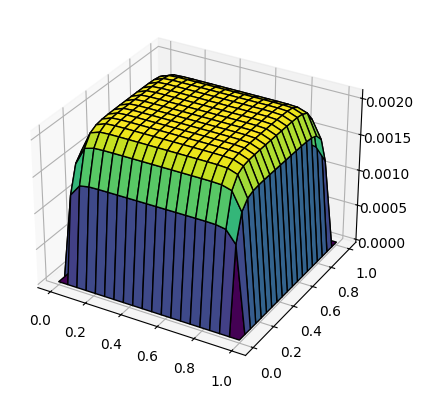

In [73]:
# RESOLUTION PARTIE 2 AVEC QUADRANGLES

from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve


n = 20 # nombre de points de la discretisation du maillage
coordinates, elements4, dirichlet, neumann = maillage_quadrangle(n)
b = np.zeros(n*n) # second membre

# matrice de raideur
A = csr_matrix((n*n, n*n), dtype=np.float32)

for e in elements4:
    # coordonnées 2D du quadrangle courant e 
    x1, y1 = coordinates[e[0]]
    x2, y2 = coordinates[e[1]]
    x3, y3 = coordinates[e[2]]
    x4, y4 = coordinates[e[3]]
    Q_local = np.array([[x1,x2,x3,x4],[y1,y2,y3,y4]])

    J = np.array([[x2-x1, x4-x1], [y2-y1, y4-y1]])
    alpha = np.linalg.det(J)


    ## CALCUL SECOND MEMBRE
    # coordonnées centre du quadrangle
    xg = (x1 + x2 + x3 + x4) / 4
    yg = (y1 + y2 + y3 + y4) / 4

    # contribution du quadrangle courant au second membre
    b_local = (alpha / 4) * f(xg, yg)

    # ajouter la contribution au second membre b aux indices correspondants aux sommets du quadrangle courant 
    b[e[0]] += b_local
    b[e[1]] += b_local
    b[e[2]] += b_local
    b[e[3]] += b_local


    ## CALCUL MATRICE DE RAIDEUR
    # ajouter la contribution du triangle courant à la matrice de raideur A aux indices correspondants aux sommets du triangle courant 

    # calcul de T = [j, k  = (J^T * J)^-1
    #                k, l]
    T = np.linalg.inv(np.matmul(np.transpose(J), J))
    #T = np.matmul(np.transpose(J), J)
    j = T[0, 0]
    k = T[0, 1]
    l = T[1, 1]

    # calcul de la matrice de raideur locale
    A11 = (2*j+3*k+2*l)*alpha/6
    A12 = (l-2j)*alpha/6
    A13 = (-l-j-3*k)*alpha/6
    A14 = (j-2*l)*alpha/6
    A21 = (l-2j)*alpha/6
    A22 = ((j+l)/3-k/2)*alpha
    A23 = (j-2*l)*alpha/6
    A24 = (-l-j+3*k)*alpha/6
    A31 = (-l-j-3*k)*alpha/6
    A32 = (j-2*l)*alpha/6
    A33 = ((j+l)/3 + k/2)*alpha
    A34 = (l/6 - j/3)*alpha
    A41 = (j-2*l)*alpha/6
    A42 = (-l-j+3*k)*alpha/6
    A43 = (l/6 - j/3)*alpha
    A44 = ((j+l)/3 - k/2)*alpha

    A_locals = np.array([[A11, A12, A13, A14],
                [A21, A22, A23, A24],
                [A31, A32, A33, A34],
                [A41, A42, A43, A44]])

    # ajouter la contribution du quadrangle courant à la matrice de raideur A aux indices correspondants aux sommets du quadrangle courant
    for u in range(4):
        for v in range(4):
            A[e[u], e[v]] += A_locals[u,v]


# ajouter conditions de Dirichlet
for ind in dirichlet:
    b[ind] = ud(coordinates[ind,0], coordinates[ind,1])
    A[ind, :] = 0
    A[ind, ind] = 1

# résolution système linéaire
x = spsolve(A, b)

show_carre(coordinates, x)


#### Résolution avec maillage mixte et conditions de Dirichlet et Neumann

# Section 2 : un nouveau terme dans l'EDP